In [1]:
print("Welcome to Machine Learning!")

Welcome to Machine Learning!


In [2]:
import sys 

assert sys.version_info >= (3, 7) 

In [3]:
from packaging import version 
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1") 

In [4]:
from pathlib import Path
import pandas as pd
import tarfile # For extracting the dataset
import urllib.request # For downloading the dataset

def load_housing_data(): # Load the California housing dataset
    """Download and extract the California housing dataset if not already present."""
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file(): # If the dataset is not already downloaded
        Path("datasets").mkdir(parents=True, exist_ok=True) #Create the datasets directory if it doesn't exist
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball: #We use a tarfile to open the downloaded file
            housing_tarball.extractall(path="datasets",filter="data") # Extract the contents to the datasets directory
    return pd.read_csv(Path("datasets/housing/housing.csv")) # Loads and read the CSV file into a pandas DataFrame and returns it

housing = load_housing_data() #Creating a variable housing and passing the DataFrame returned by the function

In [5]:
housing.head() #We can have a quick look at the first few rows of the DataFrame using the head() method

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() #We are using the info() method to get a concise summary of the DataFrame, including the number of entries, column names, data types, and non-null counts.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts() #This will give us the count of each unique value in the "ocean_proximity" column, which indicates the proximity of each house to the ocean.

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
housing.describe() #This will give us a statistical summary of the numerical columns in the DataFrame, including count, mean, standard deviation, minimum, maximum, and quartiles.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
IMAGES_PATH = Path() / "images" / "end_to_end_project" # Define the path where images will be saved
IMAGES_PATH.mkdir(parents=True, exist_ok=True) # Create the directory if it doesn't exist

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300): # Function to save figures
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}" # Construct the file path
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [10]:
import matplotlib.pyplot as plt

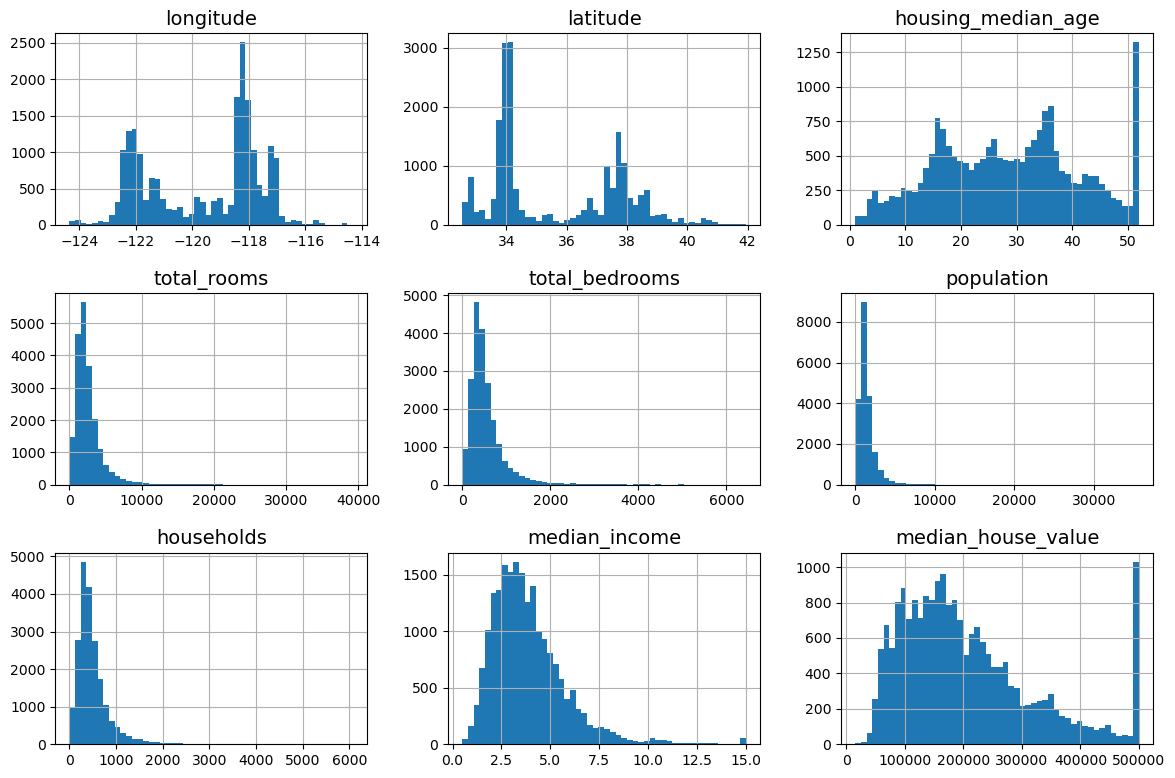

In [11]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(12, 8))
save_fig("attribute_histogram_plots")  # extra code
plt.show()

In [12]:
import numpy as np

def shuffle_and_split_data(data, test_ratio): # Function to shuffle and split the dataset into training and testing sets
    shuffled_indices = np.random.permutation(len(data)) # Generate a random permutation of indices
    test_set_size = int(len(data) * test_ratio) # Calculate the size of the test set
    test_indices = shuffled_indices[:test_set_size] # Select the first 'test_set_size' indices for the test set
    train_indices = shuffled_indices[test_set_size:] # Select the remaining indices for the training set
    return data.iloc[train_indices], data.iloc[test_indices] # Return the dataframes for training and testing sets

In [13]:
train_set, test_set = shuffle_and_split_data(housing, 0.2) # Shuffle the dataset and split it into a training set (80%) and a test set (20%)
len(train_set)

16512

In [14]:
len(test_set)

4128

In [15]:
np.random.seed(42) # Set a random seed for reproducibility. This ensures that the random operations (like shuffling) produce the same results every time the code is run, which is important for consistency in experiments and debugging.

In [16]:
from zlib import crc32 # We will use the crc32 function from the zlib library to compute a hash of the identifier. This function takes a byte string as input and returns a 32-bit integer hash value.

def is_id_in_test_set(identifier, test_ratio): # This function takes an identifier and a test ratio as input and returns True if the identifier should be in the test set, and False otherwise. It computes the hash of the identifier using crc32, converts it to a 64-bit integer, and checks if it is less than the threshold defined by the test ratio.
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_data_with_id_hash(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: is_id_in_test_set(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [17]:
housing_with_id = housing.reset_index()  # adds an `index` column
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "index")

In [18]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_data_with_id_hash(housing_with_id, 0.2, "id")

In [19]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [28]:
test_set["total_bedrooms"].isnull().sum()

np.int64(44)

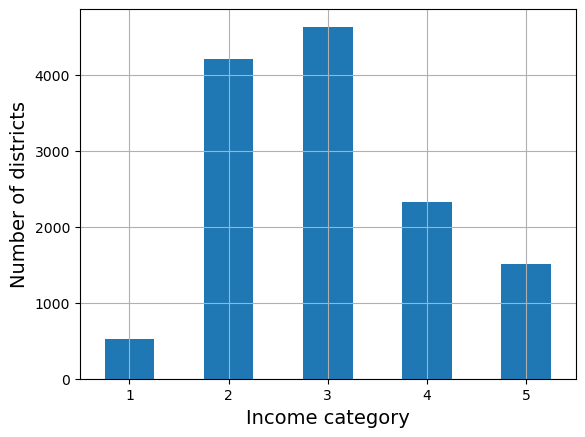

In [40]:
housing["income_cat"] = pd.cut(housing["median_income"], #Supposing that the median income is an important attribute to predict housing prices, we can create a new categorical attribute called "income_cat" by dividing the "median_income" attribute into 5 categories using the pd.cut() function. The bins parameter defines the edges of the categories, and the labels parameter assigns labels to each category.
bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
labels=[1, 2, 3, 4, 5])

housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [41]:
from sklearn.model_selection import StratifiedShuffleSplit #We will use the StratifiedShuffleSplit class from the sklearn.model_selection module to perform stratified sampling based on the "income_cat" attribute. This ensures that the distribution of income categories is preserved in both the training and test sets.
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [42]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, random_state=42, stratify=housing["income_cat"]
)

In [43]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350492
2    0.319076
4    0.176382
5    0.114307
1    0.039743
Name: count, dtype: float64

In [44]:
for set_ in (strat_train_set, strat_test_set): #Dropping the "income_cat" because it was only needed for stratification and is not a feature we want to use for training our model. We use the drop() method to remove the "income_cat" column from both the stratified training and test sets, specifying axis=1 to indicate that we are dropping a column, and inplace=True to modify the DataFrames in place.
    set_.drop("income_cat", axis=1, inplace=True)

In [45]:
#We create a copy of the stratified training set and assign it to the variable housing.
#This is done to ensure that we have a separate DataFrame for our training data that we can work with without affecting the original stratified training set. By using the copy() method, we create a new DataFrame that is independent of the original, allowing us to perform any necessary preprocessing or analysis on this new DataFrame without modifying the original data.
housing = strat_train_set.copy()

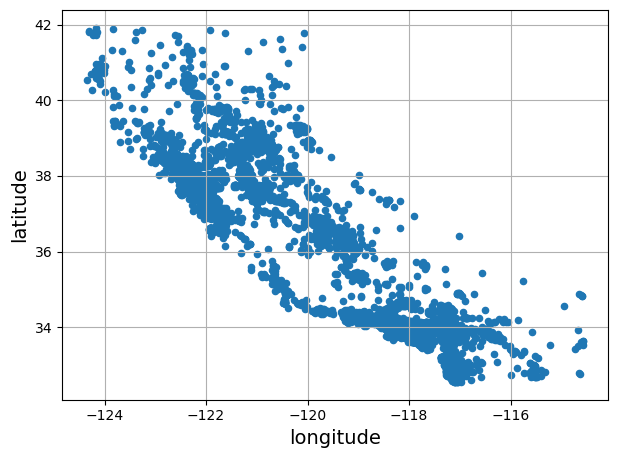

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
save_fig("bad_visualization_plot")  # extra code
plt.show()

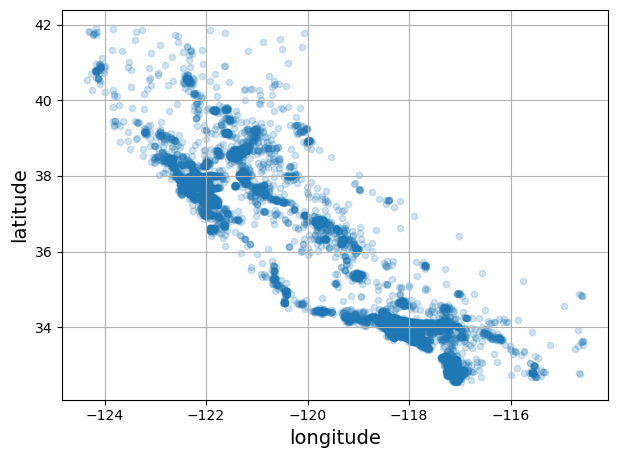

In [47]:
#Visualizing the Geographical Data
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
save_fig("better_visualization_plot")  # extra code
plt.show()

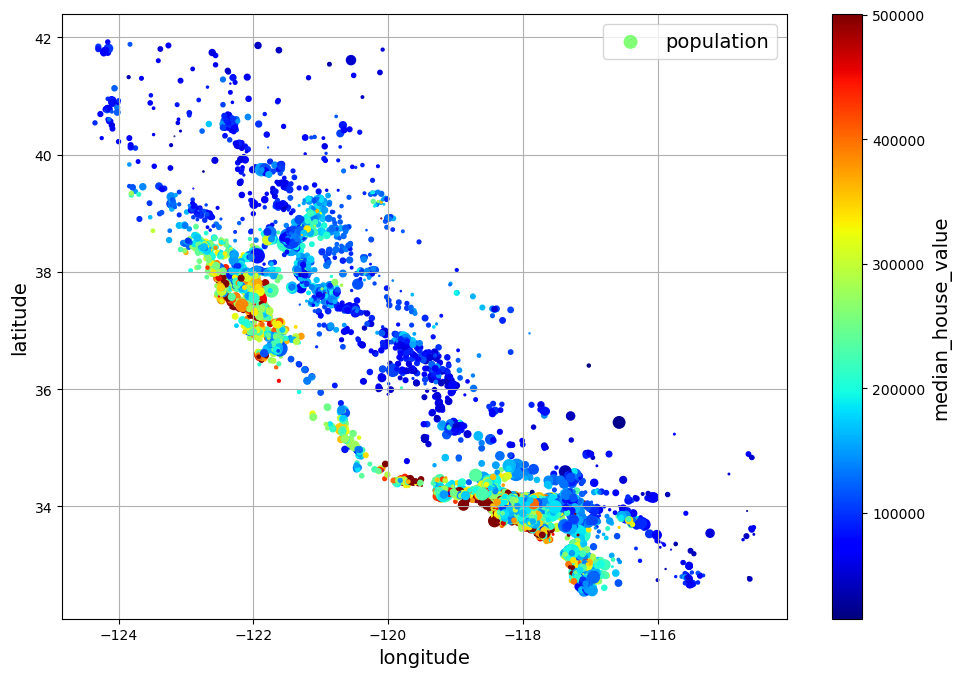

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
save_fig("housing_prices_scatterplot")  # extra code
plt.show()

In [49]:
corr_matrix = housing.corr(numeric_only=True) #We compute the correlation matrix of the housing DataFrame using the corr() method. This method calculates the pairwise correlation of the numerical columns in the DataFrame, which helps us understand how different attributes are related to each other. The resulting correlation matrix is stored in the variable corr_matrix.

In [50]:
corr_matrix["median_house_value"].sort_values(ascending=False) #We are looking at the correlation of all attributes with the "median_house_value" attribute by selecting the "median_house_value" column from the correlation matrix and sorting the values in descending order. This helps us identify which attributes have the strongest positive or negative correlation with the target variable, which can be useful for feature selection and understanding the relationships in the data.

median_house_value    1.000000
median_income         0.684201
total_rooms           0.131725
housing_median_age    0.101461
households            0.070782
total_bedrooms        0.055016
population           -0.021700
longitude            -0.055325
latitude             -0.135712
Name: median_house_value, dtype: float64

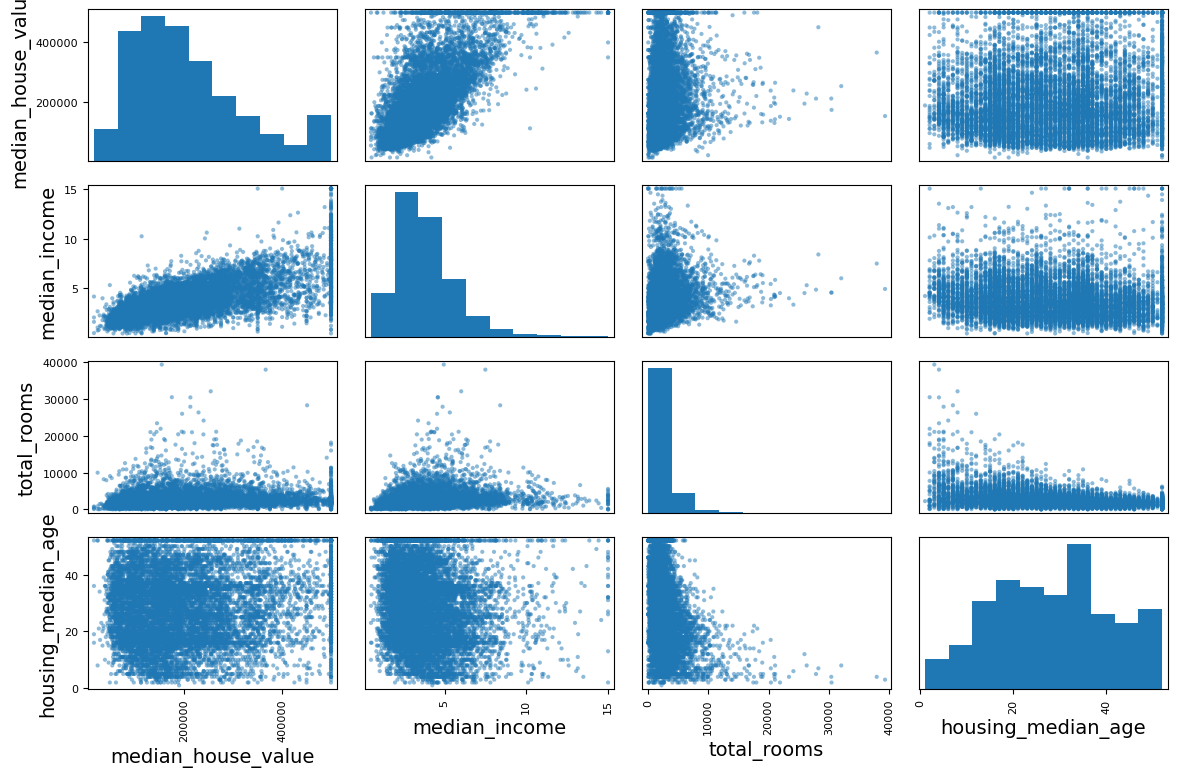

In [51]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")  # extra code
plt.show()

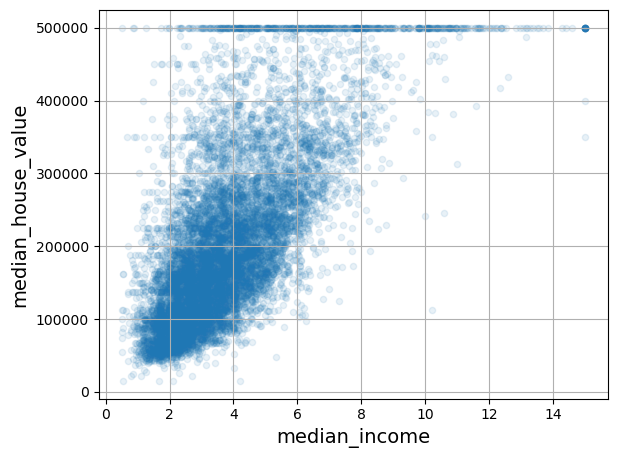

In [52]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
save_fig("income_vs_house_value_scatterplot")  # extra code
plt.show()

In [53]:
housing = strat_train_set.drop("median_house_value", axis=1) #Let's revert to the original training set and separate the target (note that strat_train_set.drop() creates a copy of strat_train_set without the column, it doesn't actually modify strat_train_set itself, unless you pass inplace=True):
housing_labels = strat_train_set["median_house_value"].copy()

In [54]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8713,-118.36,34.05,45.0,2283.0,NaN,1093.0,475.0,2.5658,<1H OCEAN
1918,-117.05,32.75,36.0,2024.0,NaN,1030.0,390.0,3.8233,NEAR OCEAN
504,-118.08,33.92,38.0,1335.0,NaN,1011.0,269.0,3.6908,<1H OCEAN
16075,-116.91,32.83,16.0,5203.0,NaN,2515.0,862.0,4.1050,<1H OCEAN
12731,-118.55,34.19,18.0,5862.0,NaN,3161.0,1280.0,3.1106,<1H OCEAN


In [ ]:
#Data Cleaning with option 1, option 2, and option 3
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)  # option 1

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [58]:
housing_option2 = housing.copy()

housing_option2.drop("total_bedrooms", axis=1, inplace=True)  # option 2

housing_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
8713,-118.36,34.05,45.0,2283.0,1093.0,475.0,2.5658,<1H OCEAN
1918,-117.05,32.75,36.0,2024.0,1030.0,390.0,3.8233,NEAR OCEAN
504,-118.08,33.92,38.0,1335.0,1011.0,269.0,3.6908,<1H OCEAN
16075,-116.91,32.83,16.0,5203.0,2515.0,862.0,4.1050,<1H OCEAN
12731,-118.55,34.19,18.0,5862.0,3161.0,1280.0,3.1106,<1H OCEAN


In [60]:
housing_option3 = housing.copy()

median = housing["total_bedrooms"].median()
housing_option3.fillna({"total_bedrooms": median}, inplace=True)  # option 3

housing_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
8713,-118.36,34.05,45.0,2283.0,432.0,1093.0,475.0,2.5658,<1H OCEAN
1918,-117.05,32.75,36.0,2024.0,432.0,1030.0,390.0,3.8233,NEAR OCEAN
504,-118.08,33.92,38.0,1335.0,432.0,1011.0,269.0,3.6908,<1H OCEAN
16075,-116.91,32.83,16.0,5203.0,432.0,2515.0,862.0,4.1050,<1H OCEAN
12731,-118.55,34.19,18.0,5862.0,432.0,3161.0,1280.0,3.1106,<1H OCEAN


In [ ]:
#Data Cleaning with SimpleImputer from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [62]:
housing_num = housing.select_dtypes(include=[np.number])

In [63]:
imputer.fit(housing_num)

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'median'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


In [64]:
imputer.statistics_

array([-118.52  ,   34.27  ,   29.    , 2122.    ,  432.    , 1163.    ,
        406.    ,    3.5387])

In [65]:
housing_num.median().values

array([-118.52  ,   34.27  ,   29.    , 2122.    ,  432.    , 1163.    ,
        406.    ,    3.5387])

In [66]:
X = imputer.transform(housing_num)

In [67]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, #After transforming the numerical data using the imputer, we create a new DataFrame called housing_tr to hold the transformed data. We pass the transformed data X as the first argument, and we set the columns of the new DataFrame to be the same as the original numerical columns from housing_num. We also set the index of housing_tr to be the same as housing_num to maintain alignment with the original data.
                          index=housing_num.index)

In [ ]:
housing_tr.loc[null_rows_idx].head() #After transforming the numerical data using the imputer, we can check the rows that previously had null values in the "total_bedrooms" column to confirm that they have been filled with the median value. We use the loc accessor to select the rows with null values (identified by null_rows_idx) and display the first few rows using head(). This allows us to verify that the imputation process has successfully filled in the missing values.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8713,-118.36,34.05,45.0,2283.0,432.0,1093.0,475.0,2.5658
1918,-117.05,32.75,36.0,2024.0,432.0,1030.0,390.0,3.8233
504,-118.08,33.92,38.0,1335.0,432.0,1011.0,269.0,3.6908
16075,-116.91,32.83,16.0,5203.0,432.0,2515.0,862.0,4.1050
12731,-118.55,34.19,18.0,5862.0,432.0,3161.0,1280.0,3.1106


In [ ]:
imputer.strategy #This will return the strategy used for imputation, which in this case is "median".

'median'

In [ ]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, 
                          index=housing_num.index)#After transforming the numerical data using the imputer, we create a new DataFrame called housing_tr to hold the transformed data. We pass the transformed data X as the first argument, and we set the columns of the new DataFrame to be the same as the original numerical columns from housing_num. We also set the index of housing_tr to be the same as housing_num to maintain alignment with the original data.

In [ ]:
housing_tr.loc[null_rows_idx].head() #After transforming the numerical data using the imputer, we can check the rows that previously had null values in the "total_bedrooms" column to confirm that they have been filled with the median value. We use the loc accessor to select the rows with null values (identified by null_rows_idx) and display the first few rows using head(). This allows us to verify that the imputation process has successfully filled in the missing values.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
8713,-118.36,34.05,45.0,2283.0,432.0,1093.0,475.0,2.5658
1918,-117.05,32.75,36.0,2024.0,432.0,1030.0,390.0,3.8233
504,-118.08,33.92,38.0,1335.0,432.0,1011.0,269.0,3.6908
16075,-116.91,32.83,16.0,5203.0,432.0,2515.0,862.0,4.1050
12731,-118.55,34.19,18.0,5862.0,432.0,3161.0,1280.0,3.1106


In [ ]:
from sklearn.ensemble import IsolationForest #We will use the IsolationForest class from the sklearn.ensemble module to detect outliers in the dataset. Isolation Forest is an unsupervised learning algorithm that identifies anomalies by isolating observations in the feature space. It works by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of that feature. This process is repeated recursively until all observations are isolated. The number of splits required to isolate an observation is used as a measure of its anomaly score, with higher scores indicating more anomalous observations.

isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(X)

In [74]:
outlier_pred

array([ 1, -1,  1, ...,  1, -1,  1], shape=(10567,))

In [75]:
#Handling Text and Categorical Attributes
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
12186,<1H OCEAN
11400,NEAR BAY
10321,<1H OCEAN
7204,INLAND
533,NEAR OCEAN
13359,INLAND
7127,INLAND
6926,INLAND


In [76]:
#Because most ML algorithms prefer to work with numerical data, we need to convert the categorical "ocean_proximity" attribute into a format that can be used for training our model. 
#We can use OrdinalEncoder from sklearn.preprocessing to encode the categorical data into numerical format. The OrdinalEncoder will assign a unique integer to each category in the "ocean_proximity" column, allowing us to represent the categorical data in a way that can be easily processed by machine learning algorithms.
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [77]:
housing_cat_encoded[:8]

array([[0.],
       [2.],
       [0.],
       [1.],
       [3.],
       [1.],
       [1.],
       [1.]])

In [78]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [79]:
#We will use OneHotEncoder from sklearn.preprocessing to convert the categorical data into a one-hot encoded format. 
# This will create binary columns for each category in the "ocean_proximity" column, 
# allowing us to represent the categorical data in a way that can be easily processed by machine learning algorithms without implying any ordinal relationship between the categories.
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [80]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 10567 stored elements and shape (10567, 4)>

In [81]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], shape=(10567, 4))

In [82]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], shape=(10567, 4))

In [83]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [84]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [85]:
cat_encoder.transform(df_test)

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [86]:
df_test_unknown = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(df_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [87]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(df_test_unknown)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [88]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [89]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype=object)

In [90]:
df_output = pd.DataFrame(cat_encoder.transform(df_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_test_unknown.index)

In [91]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0


In [ ]:
#Feature Scaling and Transformation